### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [40]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

### Visualizing the data  
Use `matplotlib` to visualize the given data.

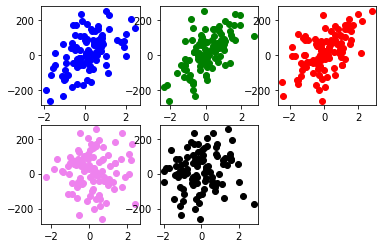

In [41]:
import matplotlib.pyplot as plt
plt.subplot(2, 3, 1)
plt.scatter(X[:,0], y, c ='blue')
plt.subplot(2, 3, 2)
plt.scatter(X[:,1], y, c ='green')
plt.subplot(2, 3, 3)
plt.scatter(X[:,2], y, c ='red')
plt.subplot(2, 3, 4)
plt.scatter(X[:,3], y, c ='violet')
plt.subplot(2, 3, 5)
plt.scatter(X[:,4], y, c ='black')
plt.show()


You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [51]:
import numpy as np

class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        # Your code here
        self.lr = learning_rate
        self.n_iters = n_iters
        self.bias = None
        self.weights = None
   

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.bias = 0
        self.weights = np.zeros(n_features)

        for _ in range(self.n_iters): 
            y_predicted = np.dot(X, self.weights) + self.bias
            # computing the gradient 
            dw = (-2 / n_samples) * np.dot(X.T, (-y_predicted + y))
            db = (-2 / n_samples) * np.sum(-y_predicted + y)
            # update the current parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
        
    def predict(self, X):
        # Code goes here
         linear_model = np.dot(X, self.weights) + self.bias
         return linear_model



### Initializing, Training & Predictions

In [52]:
# Now, we make an object of our custom class.
regressor = LinearRegression() 

# Call the fit method on the object to train 
regressor.fit(X_train,y_train)

# Now, let's see our what our model predicts
predictions = regressor.predict(X_test)

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [53]:
def mean_squared_error(y_true, y_pred):
       sum=0
       m_sample = len(y_true)
       diff = y_true-y_pred;
       mse = (1/m_sample)*(np.sum(np.multiply(diff, diff)))
       return mse 



def r2_score(y_true, y_pred):
       ssr=0
       sst=0
       y_mean=0
       m_sample = len(y_true)
       diff1 = y_true-y_pred;
       diff2 = y_true -y_mean
       y_mean = np.mean(y_true)
       ssr = np.sum(np.multiply(diff1,diff1))
       sst=np.sum(np.multiply(diff2,diff2))
       r2 = 1-(ssr/sst)
       return r2
mse = mean_squared_error(y_test,predictions)
print("MSE:", mse)

accu = r2_score(y_test,predictions)
print("Accuracy:", accu)

MSE: 659.4416574156699
Accuracy: 0.9450480374102799
